# Process txt files with RM 2-way ANOVA


Jaime Heiss

05/11/2022

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
dirtxt='G:\My Drive\formerlab\camkpaper\stats\pengvglut2'
fntxt='dosingPTwa.txt'
def text2df(pathtofile,cnds=['CNO','SAL']):
    df=pd.DataFrame()
    with open(pathtofile) as f:
        lines = f.readlines()

In [3]:
dirtxt=r'C:\Users\US Retail\Documents\camkpaper\processed_data\mats_gad_cre_camK_dta\dosing'
df = pd.read_excel(os.path.join(listdir(dirtxt)

['dosing',
 'dosingBDNrem.txt',
 'dosingBDNrem.xls',
 'dosingBDrem.txt',
 'dosingBDrem.xls',
 'dosingBDwa.txt',
 'dosingBDwa.xls',
 'dosingHT.txt',
 'dosingHT.xls',
 'dosingPTNrem.txt',
 'dosingPTNrem.xls',
 'dosingPTrem.txt',
 'dosingPTrem.xls',
 'dosingPTwa.txt',
 'dosingPTwa.xls',
 'dosingSWA.txt',
 'dosingSWA.xls',
 'dosingWBDhist.txt',
 'dosingWBDhist.xls',
 'dosing_cre',
 'dosing_creBDNrem.txt',
 'dosing_creBDNrem.xls',
 'dosing_creBDrem.txt',
 'dosing_creBDrem.xls',
 'dosing_creBDwa.txt',
 'dosing_creBDwa.xls',
 'dosing_creHT.txt',
 'dosing_creHT.xls',
 'dosing_crePTNrem.txt',
 'dosing_crePTNrem.xls',
 'dosing_crePTrem.txt',
 'dosing_crePTrem.xls',
 'dosing_crePTwa.txt',
 'dosing_crePTwa.xls',
 'dosing_creSWA.txt',
 'dosing_creSWA.xls',
 'dosing_creWBDhist.txt',
 'dosing_creWBDhist.xls',
 'dosing_wt']

In [10]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [12]:
fn=os.path.join(dirtxt,fntxt)
df=pd.DataFrame(columns=['subjectID','ptWA','ZT','Cond'])
with open(fn) as f:
        lines = f.readlines()
posc=0
cnds=['CNO','SAL']
firstZT=0
for i,l in enumerate(lines):
    df1l = pd.DataFrame(columns=['subjectID','ptWA','ZT','Cond'])
    numb=[float(e) for e in l.split()]
    df1l['ptWA'] = numb
    df1l['ZT'] = np.arange(firstZT,firstZT+len(numb))
    df1l['subjectID'] = 'mse'+str(1+i//len(cnds))
    df1l['Cond']=cnds[posc]
    posc+=1
    if posc>1:
        posc=0
    df=df.append(df1l,ignore_index=True)

df




,subjectID,ptWA,ZT,Cond
0,mse1,35.627081,0,CNO
1,mse1,64.816870,1,CNO
2,mse1,100.000000,2,CNO
3,mse1,100.000000,3,CNO
4,mse1,100.000000,4,CNO
...,...,...,...,...
187,mse8,23.529412,7,SAL
188,mse8,65.149834,8,SAL
189,mse8,21.864595,9,SAL
190,mse8,62.042175,10,SAL


<AxesSubplot:xlabel='ZT', ylabel='ptWA'>

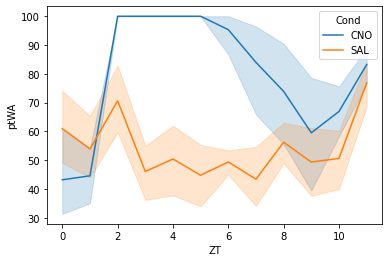

In [14]:
import seaborn as sns
sns.lineplot(x='ZT',y='ptWA',hue='Cond',data=df)

In [15]:
aovrm2way = AnovaRM(df, 'ptWA', 'subjectID', within=['ZT', 'Cond'])
res2way = aovrm2way.fit()

print(res2way)

                Anova
        F Value  Num DF  Den DF Pr > F
--------------------------------------
ZT      10.5321 11.0000 77.0000 0.0000
Cond    75.6015  1.0000  7.0000 0.0001
ZT:Cond  9.8834 11.0000 77.0000 0.0000



In [24]:
#Perform corrected comparison across condtions for every ZT
from scipy.stats import ttest_rel

# Python paired sample t-test
pvals=[]
for zt in df.ZT.unique():
    a=df.loc[(df.Cond==cnds[0])&(df.ZT==zt),'ptWA'].values
    b=df.loc[(df.Cond==cnds[1])&(df.ZT==zt),'ptWA'].values
    pvals.append(ttest_rel(a, b).pvalue)
pvals=np.array(pvals)*len(pvals)
pvals<0.05


array([False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False])